# 2. Size Effect : 소형주 효과

## 2.1. 소형주 효과의 발견과 의미

* Rolf W. Banz의 1981년 “The Relationship Between Market Value and Return of Common Stocks”
* 해당 논문을 통해 1926년-1980년 기간 중 NYSE에 상장된 종목들을 시가총액가중 기준으로 분류하여 수익률과 리스크를 측정한 결과, 시가총액이 큰 종목이 작은 종목의 리스크 대비 초과수익률이 존재
* 이는 효율적 시장가설(Efficient Mkt Theory)에 반하는 실증적 발견으로 시장의 Anomaly 중 하나로 연구되기 시작함.
* Fama-French의 3 Factor model에서도 Size Effect와 B/M은 시장의 체계적인 리스크(Systemical Risk)로 설명되지 않는 Factor로 바라봄.

## 2.2. 각 지역별 SMB 팩터 누적 수익률 : 1990.07~2023

### 2.2.1. 데이터 import 및 확인

In [1]:
import pandas as pd
from scipy import stats, polyval, polyfit  
from pylab import plot, title, show, legend 
import FinanceDataReader as fdr
import numpy as np

In [2]:
df = pd.read_excel('./smb_cumreturn_data.xlsx', index_col = 0)
df.index = pd.to_datetime(df.index)
df

,Global,Global Ex USA,Europe,JPN,Pacific Ex JPN
DATE,,,,,
1990-06-30,0.023953,0.033701,-0.007758,0.043064,0.000000
1990-07-31,0.006326,0.024756,-0.010180,0.050074,-0.003582
1990-08-31,-0.027246,-0.025706,-0.008476,-0.039147,0.002109
1990-09-30,-0.029016,-0.027580,-0.024252,-0.032588,0.002300
1990-10-31,0.009829,0.041655,-0.006241,0.080607,-0.005852
...,...,...,...,...,...
2023-01-31,0.025646,-0.006308,-0.004685,-0.005857,-0.007914
2023-02-28,0.001857,-0.001099,-0.007742,0.003465,0.005481
2023-03-31,-0.047512,-0.040769,-0.044808,-0.006485,-0.032614


### 2.2.2. 데이터 연산 : 누적수익률

In [3]:
# df의 각 컬럼(지역구분)에 담겨있는 월별 수익률의 누적 수익률 계산 : 객체명.cumprod() 함수 이용
df1 = (1 + df['Global']/100).cumprod() -1  # global
df2 = (1 + df['Global Ex USA']/100).cumprod() -1  # global ex USA
df3 = (1 + df['Europe']/100).cumprod() -1  # Europe
df4 = (1 + df['JPN']/100).cumprod() -1  # JPN
df5 = (1 + df['Pacific Ex JPN']/100).cumprod() -1  # pacific exJPN
df6 = df1 - df2  # USA

In [4]:
# cumprod()의 함수 결과 타입이 series 이므로 이를 DataFrame 타입으로 변경
# % 단위 표현을 위해 곱하기 연산 추가
frame = pd.Series.to_frame(df1) * 100
frame['Global Ex USA'] = df2 * 100
frame['Europe'] = df3 * 100
frame['JPN'] = df4 * 100
frame['Pacific Ex JPN'] = df5 * 100
frame['US'] = df6 * 100

frame.tail()  # 누적수익률 지표

,Global,Global Ex USA,Europe,JPN,Pacific Ex JPN,US
DATE,,,,,,
2023-01-31,-0.047222,-0.368529,-0.459179,-0.184991,-0.130672,0.321308
2023-02-28,-0.045366,-0.369624,-0.466886,-0.181533,-0.125198,0.324258
2023-03-31,-0.092856,-0.410243,-0.511484,-0.188006,-0.157771,0.317387
2023-04-30,-0.120215,-0.423648,-0.523879,-0.201078,-0.156171,0.303433
2023-05-31,-0.106645,-0.421136,-0.505312,-0.241817,-0.131243,0.314490


### 2.2.3. 지역별 SMB 팩터 누적 수익률 시각화

<AxesSubplot:xlabel='DATE'>

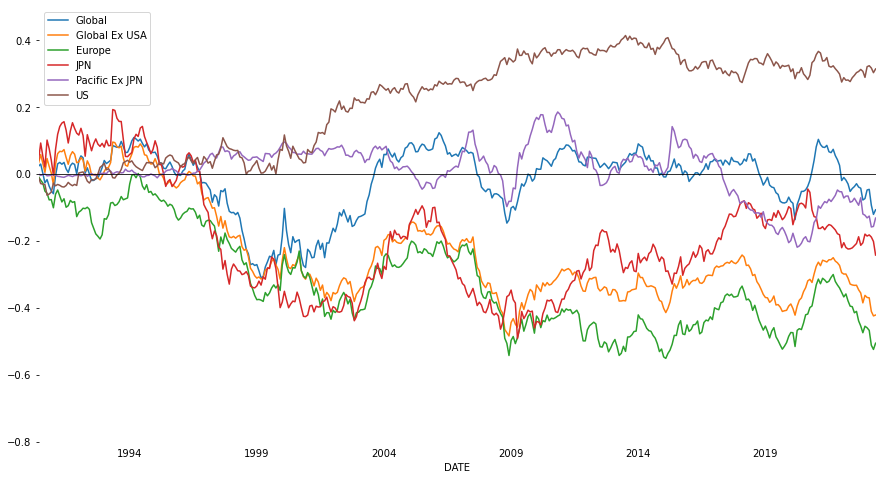

In [5]:
ax = frame.plot(figsize=(15, 8))
ax.axhline(0, color='black',lw=0.8) 
frame.index = pd.to_datetime(frame.index, format = 'Ym')
ax.set_ylim(-0.8, 0.5)

ax.spines['right'].set_color('none') # 박스없애기(오른쪽 선 지우기 = 색없음)
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.xaxis.set_ticks_position('none') # x축의 눈금 삭제(none)  cf) left, right

ax

* 1990.06부터 2023.05 까지의 기간동안에 대해 각 지역별 SMB 팩터 검증 결과 Banz의 주장과 달리 소형주 효과의 존재 여부에 대해 의문을 갖게 하는 결과가 도출됨

### 2.2.4. SMB팩터 누적 수익률 : Global vs US

In [6]:
frame2 = pd.Series.to_frame(df1) * 100
frame2['US'] = df6 * 100
frame2

,Global,US
DATE,,
1990-06-30,0.023953,-0.009748
1990-07-31,0.030280,-0.028184
1990-08-31,0.003026,-0.029718
1990-09-30,-0.025991,-0.031146
1990-10-31,-0.016164,-0.062977
...,...,...
2023-01-31,-0.047222,0.321308
2023-02-28,-0.045366,0.324258
2023-03-31,-0.092856,0.317387


<AxesSubplot:xlabel='DATE'>

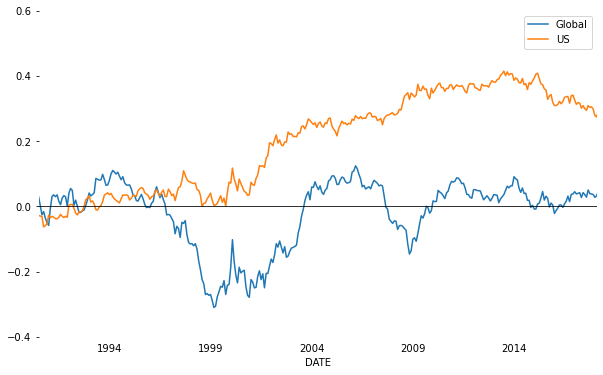

In [7]:
ax1 = frame2.plot(figsize=(10,6))
ax1.axhline(0, color='black',lw=0.8)
ax1.set_xlim(pd.Timestamp('1990-07-01'), pd.Timestamp('2018-02-01'))
ax1.set_ylim(-0.4, 0.6)

ax1.spines['right'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.xaxis.set_ticks_position('none') 

ax1

## 2.3. 각 지역별 소형RMW-대형RMW 누적 수익률 : 1990~2023

* RMW == Robust Minis Weak == 파마프렌치 3요인 모델에서 가치주-성장주 요인을 의미 [HML]

* 소형주 효과 검증을 위해 '시가총액가중 기준'과 '동일가중 기준' 포트폴리오에 대하여 누적 수익률 분석

### 2.3.1. 시가총액가중기준

In [8]:
df_glo = pd.read_excel('./시가총액가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=0, index_col=0)
df_exus = pd.read_excel('./시가총액가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=1, index_col=0)
df_eu = pd.read_excel('./시가총액가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=2, index_col=0)
df_jpn = pd.read_excel('./시가총액가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=3, index_col=0)
df_exjpn = pd.read_excel('./시가총액가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=4, index_col=0)

df_glo.index = pd.to_datetime(df_glo.index)
df_exus.index = pd.to_datetime(df_exus.index)
df_eu.index = pd.to_datetime(df_eu.index)
df_jpn.index = pd.to_datetime(df_jpn.index)
df_exjpn.index = pd.to_datetime(df_exjpn.index)

In [9]:
df_glo.head()

,SMALL LoOP,SMALL HiOP,BIG LoOP,BIG HiOP
Date,,,,
1990-07-01,1.44,3.37,1.97,0.44
1990-08-01,-11.19,-11.67,-10.39,-9.61
1990-09-01,-10.10,-10.75,-12.19,-11.14
1990-10-01,2.50,4.58,9.80,13.64
1990-11-01,-3.42,-1.45,-4.15,-3.49


* SMALL LoOP (Small Low Operating Profit): 영업이익이 낮고 규모가 작은 기업
    - 작은 규모의 기업이며 영업 활동을 통해 상대적으로 낮은 수준의 이익을 창출하는 상태
    - 작은 기업이므로 영업 이익의 크기도 비교적 작은 상태
* Big LoOP (Big Low Operating Profit): 영업이익이 낮지만 규모가 큰 기업
    - 큰 규모의 기업이지만 영업 활동을 통해 상대적으로 낮은 수준의 이익을 창출하는 상태
    - 큰 기업이므로 많은 자산과 많은 사업 영역을 갖추고 있지만 영업 이익은 여전히 상대적으로 낮은 상태
* SMALL HiOP (Small High Operating Profit): 영업이익이 높지만 규모가 작은 기업
    - 작은 규모의 기업이지만 영업 활동을 통해 상대적으로 높은 수준의 이익을 창출하는 상태
    - 작은 기업이지만 효율적인 운영과 성공적인 사업 모델로 인해 높은 영업 이익을 얻는 상태
* Big HiOP (Big High Operating Profit): 영업이익이 높고 규모가 큰 기업
    - 큰 규모의 기업이며 영업 활동을 통해 상대적으로 높은 수준의 이익을 창출하는 상태
    - 큰 기업이고 효율적인 운영과 성공적인 사업 모델로 인해 높은 영업 이익을 얻는 상태
    
    
    (출처 : chat gpt)

In [10]:
# 소형 RMW - 대형 RMW
d1 = (df_glo['SMALL HiOP'] - df_glo['SMALL LoOP']) - (df_glo['BIG HiOP'] - df_glo['BIG LoOP'])
d2 = (df_exus['SMALL HiOP'] - df_exus['SMALL LoOP']) - (df_exus['BIG HiOP'] - df_exus['BIG LoOP'])
d3 = (df_eu['SMALL HiOP'] - df_eu['SMALL LoOP']) - (df_eu['BIG HiOP'] - df_eu['BIG LoOP'])
d4 = (df_jpn['SMALL HiOP'] - df_jpn['SMALL LoOP']) - (df_jpn['BIG HiOP'] - df_jpn['BIG LoOP'])
d5 = (df_exjpn['SMALL HiOP'] - df_exjpn['SMALL LoOP']) - (df_exjpn['BIG HiOP'] - df_exjpn['BIG LoOP'])

In [11]:
print(d5.head())
print('----------------')
print(d5.tail())

Date
1990-07-01   -1.19
1990-08-01   -1.03
1990-09-01   -1.25
1990-10-01    1.19
1990-11-01   -0.15
dtype: float64
----------------
Date
2023-02-01    2.02
2023-03-01    0.60
2023-04-01    3.65
2023-05-01   -1.96
2023-06-01   -0.71
dtype: float64


In [12]:
# 데이터 연산 : 지역별 누적 수익률 계산
d1 = (1 + d1/100).cumprod() - 1
d2 = (1 + d2/100).cumprod() - 1
d3 = (1 + d3/100).cumprod() - 1
d4 = (1 + d4/100).cumprod() - 1
d5 = (1 + d5/100).cumprod() - 1

In [13]:
# 계산된 데이터 정리 : 계산 결과 type 변경 : series -> DataFrame
x1 = pd.DataFrame({'Global': d1,
                 'Global ex US': d2,
                 'Europe': d3,
                 'Japan': d4,
                 'Asia ex Japan': d5})
x1 = x1[['Global','Global ex US','Europe','Japan','Asia ex Japan']]
x1

,Global,Global ex US,Europe,Japan,Asia ex Japan
Date,,,,,
1990-07-01,0.034600,0.033300,0.018100,0.059200,-0.011900
1990-08-01,0.021564,0.031957,0.023394,0.037486,-0.022077
1990-09-01,0.004197,0.037942,0.002415,0.024829,-0.034301
1990-10-01,-0.013476,-0.013332,0.029580,-0.038198,-0.022810
1990-11-01,-0.000553,0.016268,0.029374,-0.062147,-0.024275
...,...,...,...,...,...
2023-02-01,-0.103672,0.757017,1.380493,-0.118348,0.703169
2023-03-01,-0.138988,0.713092,1.307174,-0.139596,0.713388
2023-04-01,-0.142690,0.718745,1.332553,-0.156632,0.775926


#### 2.3.1. [a] 지역별 RMW팩터 누적 수익률 시각화

<AxesSubplot:title={'center':'Average Value Weighted'}, xlabel='Date'>

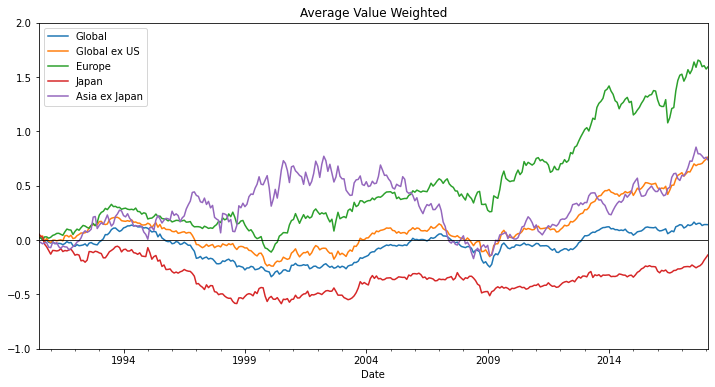

In [14]:
# 소형주 효과를 반영한 RMW 지역별 누적수익률 그래프 시각화01
ax2 = x1.plot(figsize=(12,6))
ax2.set_xlim(pd.Timestamp('1990-07-01'), pd.Timestamp('2018-02-01'))
ax2.set_ylim(-1, 2)
ax2.axhline(0, color='black',lw=0.8)
ax2.set_title('Average Value Weighted')

ax2

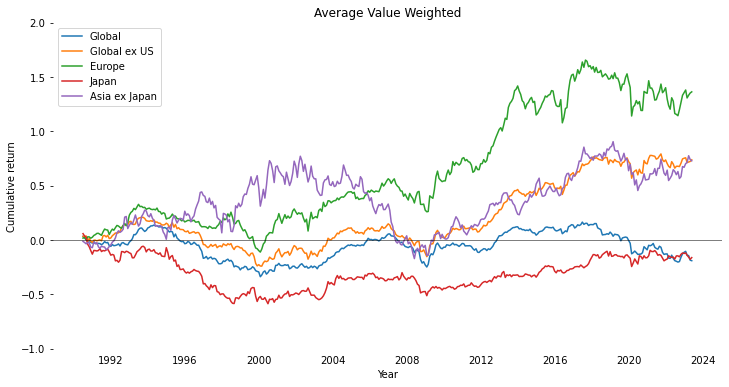

In [15]:
# 시각화02
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
ax4 = fig.add_subplot(1,1,1)
ax4.plot(d1, label='Global')
ax4.plot(d2, label='Global ex US')
ax4.plot(d3, label='Europe')
ax4.plot(d4, label='Japan')
ax4.plot(d5, label='Asia ex Japan')
ax4.set_xlabel('Year')
ax4.set_ylabel('Cumulative return')
ax4.set_ylim(-1,2)
ax4.xaxis.set_ticks_position('none') 

ax4.spines['right'].set_color('none')
ax4.spines['left'].set_color('none')
ax4.spines['top'].set_color('none')
ax4.spines['bottom'].set_color('none')

ax4.legend()
plt.title('Average Value Weighted')
plt.axhline(0, color='black',lw=0.5)

plt.show()

#### 2.3.1. [b] RMW팩터 누적 수익률 : Global vs US

In [16]:
x2 = pd.DataFrame({'Global': d1, 'US': d2-d1})
x2

,Global,US
Date,,
1990-07-01,0.034600,-0.001300
1990-08-01,0.021564,0.010393
1990-09-01,0.004197,0.033745
1990-10-01,-0.013476,0.000144
1990-11-01,-0.000553,0.016821
...,...,...
2023-02-01,-0.103672,0.860690
2023-03-01,-0.138988,0.852079
2023-04-01,-0.142690,0.861435


<AxesSubplot:xlabel='Date'>

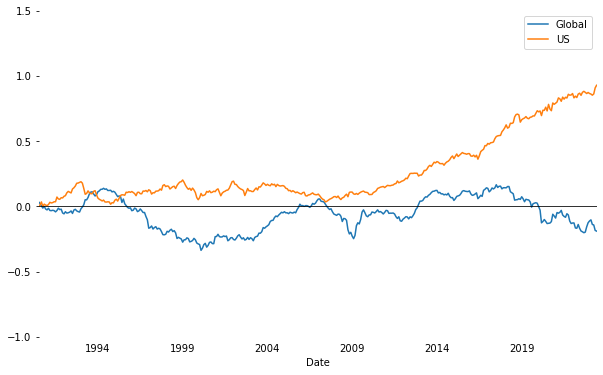

In [17]:
ax3 = x2.plot(figsize=(10,6))
ax3.axhline(0, color='black',lw=0.8)
# ax3.set_xlim(pd.Timestamp('1990'), pd.Timestamp('2018'))
ax3.set_ylim(-1, 1.5)

ax3.spines['right'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.xaxis.set_ticks_position('none') 

ax3

### 2.3.2. 동일가중기준

In [18]:
df_glo = pd.read_excel('동일가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=0, index_col=0)
df_exus = pd.read_excel('동일가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=1, index_col=0)
df_eu = pd.read_excel('동일가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=2, index_col=0)
df_jpn = pd.read_excel('동일가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=3, index_col=0)
df_exjpn = pd.read_excel('동일가중 기준 소형RMW - 대형RMW.xlsx',sheet_name=4, index_col=0)

df_glo.index = pd.to_datetime(df_glo.index)
df_exus.index = pd.to_datetime(df_exus.index)
df_eu.index = pd.to_datetime(df_eu.index)
df_jpn.index = pd.to_datetime(df_jpn.index)
df_exjpn.index = pd.to_datetime(df_exjpn.index)

In [19]:
df_glo

,SMALL LoOP,SMALL HiOP,BIG LoOP,BIG HiOP
DATE,,,,
1990-07-01,1.62,3.19,2.05,2.62
1990-08-01,-7.97,-9.83,-11.68,-11.61
1990-09-01,-8.51,-9.73,-12.94,-12.24
1990-10-01,-1.41,2.46,11.35,11.86
1990-11-01,-1.22,-1.21,-4.81,-3.77
...,...,...,...,...
2023-02-01,-4.05,-2.92,-2.46,-2.62
2023-03-01,-2.86,-0.33,-1.06,1.82
2023-04-01,-0.10,0.04,0.40,1.01


In [20]:
# 소형 RMW - 대형 RMW
d1 = (df_glo['SMALL HiOP'] - df_glo['SMALL LoOP']) - (df_glo['BIG HiOP'] - df_glo['BIG LoOP'])
d2 = (df_exus['SMALL HiOP'] - df_exus['SMALL LoOP']) - (df_exus['BIG HiOP'] - df_exus['BIG LoOP'])
d3 = (df_eu['SMALL HiOP'] - df_eu['SMALL LoOP']) - (df_eu['BIG HiOP'] - df_eu['BIG LoOP'])
d4 = (df_jpn['SMALL HiOP'] - df_jpn['SMALL LoOP']) - (df_jpn['BIG HiOP'] - df_jpn['BIG LoOP'])
d5 = (df_exjpn['SMALL HiOP'] - df_exjpn['SMALL LoOP']) - (df_exjpn['BIG HiOP'] - df_exjpn['BIG LoOP'])

In [21]:
d1

DATE
1990-07-01    1.00
1990-08-01   -1.93
1990-09-01   -1.92
1990-10-01    3.36
1990-11-01   -1.03
              ... 
2023-02-01    1.29
2023-03-01   -0.35
2023-04-01   -0.47
2023-05-01    1.94
2023-06-01    0.19
Length: 396, dtype: float64

In [22]:
# 소형 RMW - 대형 RMW 누적 수익률 계산
d1 = (1 + d1/100).cumprod() - 1
d2 = (1 + d2/100).cumprod() - 1
d3 = (1 + d3/100).cumprod() - 1
d4 = (1 + d4/100).cumprod() - 1
d5 = (1 + d5/100).cumprod() - 1

In [23]:
d1

DATE
1990-07-01    0.010000
1990-08-01   -0.009493
1990-09-01   -0.028511
1990-10-01    0.004131
1990-11-01   -0.006211
                ...   
2023-02-01   -0.619405
2023-03-01   -0.620737
2023-04-01   -0.622520
2023-05-01   -0.615197
2023-06-01   -0.614465
Length: 396, dtype: float64

In [24]:
# 연산된 데이터 정리
x3 = pd.DataFrame({'Global': d1,
                 'Global ex US': d2,
                 'Europe': d3,
                 'Japan': d4,
                 'Asia ex Japan': d5})
x3 = x3[['Global','Global ex US','Europe', 'Japan','Asia ex Japan']]
x3

,Global,Global ex US,Europe,Japan,Asia ex Japan
DATE,,,,,
1990-07-01,0.010000,0.008900,0.009400,0.036900,-0.019600
1990-08-01,-0.009493,-0.015314,0.004252,0.029538,-0.045581
1990-09-01,-0.028511,-0.027425,-0.013824,0.023464,-0.030692
1990-10-01,0.004131,0.009630,0.008956,0.006679,-0.007331
1990-11-01,-0.006211,-0.003293,-0.008801,-0.007918,-0.017556
...,...,...,...,...,...
2023-02-01,-0.619405,-0.479924,0.266562,-0.210629,-0.959582
2023-03-01,-0.620737,-0.482004,0.227172,-0.216312,-0.959383
2023-04-01,-0.622520,-0.478534,0.243862,-0.212942,-0.958721


<AxesSubplot:title={'center':'Average Equal Weighted'}, xlabel='DATE'>

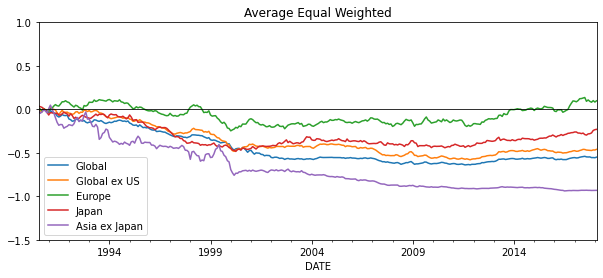

In [25]:
ax5 = x3.plot(figsize=(10, 4))
ax5.set_xlim(pd.Timestamp('1990-07'), pd.Timestamp('2018-02'))
ax5.set_ylim(-1.5, 1)
ax5.axhline(0, color='black',lw=0.8)
ax5.set_title('Average Equal Weighted')

ax5

* 3Factor Model에서 HML Factor의 누적수익률 분석 결과
* 시가총액가중기준으로 pfo 구성한 경우 : 우상향 경향(장기적)
* 동일가중기준으로 pfo 구성한 경우 : 우하향 경향(장기적)
* 따라서 지역별 RMW팩터 누적 수익률은 시가총액가중기준으로 pfo 구성하는 것이 적절

## 2.4. 소형주 효과를 반영한 소형CMA-대형CMA 누적 수익률

* 기업의 투자 정도 또는 자산 투자 효율성을 나타내는 지표  

* SMALL LoINV (Small Low Investment): 
    - 투자 정도가 작고 규모가 작은 기업 중에서 자산 투자 효율성이 낮은 기업
    - 작은 규모의 기업이며 자산 투자를 효율적으로 이뤄내지 못하고 있는 상태
* ME1 INV2 (Medium-sized Firm and Investment): 
    - 중간 규모의 기업 중에서 자산 투자 효율성이 보통 수준인 기업
    - 중간 규모의 기업이며 상대적으로 보통 수준의 자산 투자를 하고 있는 상태
* SMALL HiINV (Small High Investment): 
    - 투자 정도가 작고 규모가 작은 기업 중에서 자산 투자 효율성이 높은 기업
    - 작은 규모의 기업이지만 자산 투자를 효율적으로 이뤄내고 있는 상태
* BIG LoINV (Big Low Investment): 
    - 투자 정도가 작지만 규모가 큰 기업 중에서 자산 투자 효율성이 낮은 기업
    - 큰 규모의 기업이지만 자산 투자를 효율적으로 이뤄내지 못하고 있는 상태
* ME2 INV2 (Medium-sized Firm and Investment): 
    - 중간 규모의 기업 중에서 자산 투자 효율성이 보통 수준인 기업
    - 중간 규모의 기업이며 상대적으로 보통 수준의 자산 투자를 하고 있는 상태
* BIG HiINV (Big High Investment): 
    - 투자 정도가 높고 규모가 큰 기업 중에서 자산 투자 효율성이 높은 기업
    - 큰 규모의 기업이며 자산 투자를 효율적으로 이뤄내고 있는 상태


    (출처 : chat gpt)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.4.1. 시가총액가중기준

In [27]:
data_glo = pd.read_excel('시가총액가중기준CMA.xlsx', sheet_name=0,index_col=0)
data_exus = pd.read_excel('시가총액가중기준CMA.xlsx', sheet_name=1,index_col=0)
data_eu = pd.read_excel('시가총액가중기준CMA.xlsx', sheet_name=2,index_col=0)
data_jpn = pd.read_excel('시가총액가중기준CMA.xlsx', sheet_name=3,index_col=0)
data_exjpn = pd.read_excel('시가총액가중기준CMA.xlsx', sheet_name=4,index_col=0)

data_glo.index = pd.to_datetime(data_glo.index)
data_exus.index = pd.to_datetime(data_exus.index)
data_eu.index = pd.to_datetime(data_eu.index)
data_jpn.index = pd.to_datetime(data_jpn.index)
data_exjpn.index = pd.to_datetime(data_exjpn.index)

In [28]:
data_glo.head()

,SMALL LoINV,ME1 INV2,SMALL HiINV,BIG LoINV,ME2 INV2,BIG HiINV
DATE,,,,,,
1990-07-01,1.90,1.79,0.93,2.23,0.97,0.50
1990-08-01,-10.61,-10.69,-12.22,-9.18,-10.10,-9.98
1990-09-01,-9.73,-9.58,-10.59,-9.66,-10.76,-13.11
1990-10-01,2.80,3.70,0.98,11.16,9.82,10.96
1990-11-01,-2.97,-0.64,0.11,-3.87,-2.12,-2.71


In [29]:
data_exus.head()

,SMALL LoINV,ME1 INV2,SMALL HiINV,BIG LoINV,ME2 INV2,BIG HiINV
DATE,,,,,,
1990-07-01,4.84,4.76,4.83,2.95,1.92,1.80
1990-08-01,-10.71,-10.56,-11.17,-10.30,-10.43,-9.86
1990-09-01,-10.68,-10.61,-11.24,-13.52,-14.13,-14.54
1990-10-01,7.81,7.90,5.69,18.84,15.50,16.22
1990-11-01,-7.03,-4.61,-5.58,-8.61,-6.73,-6.67


In [30]:
d1 = (data_glo['SMALL LoINV']-data_glo['SMALL HiINV']) - (data_glo['BIG LoINV']-data_glo['BIG HiINV'])
d2 = (data_exus['SMALL LoINV']-data_exus['SMALL HiINV']) - (data_exus['BIG LoINV']-data_exus['BIG HiINV'])
d3 = (data_eu['SMALL LoINV']-data_eu['SMALL HiINV']) - (data_eu['BIG LoINV']-data_eu['BIG HiINV'])
d4 = (data_jpn['SMALL LoINV']-data_jpn['SMALL HiINV']) - (data_jpn['BIG LoINV']-data_jpn['BIG HiINV'])
d5 = (data_exjpn['SMALL LoINV']-data_exjpn['SMALL HiINV']) - (data_exjpn['BIG LoINV']-data_exjpn['BIG HiINV'])

d1

DATE
1990-07-01   -0.76
1990-08-01    0.81
1990-09-01   -2.59
1990-10-01    1.62
1990-11-01   -1.92
              ... 
2023-02-01    1.31
2023-03-01    4.21
2023-04-01   -2.20
2023-05-01    4.53
2023-06-01    0.98
Length: 396, dtype: float64

In [31]:
# 누적수익률 계산
d1 = (1 + d1/100).cumprod() - 1
d2 = (1 + d2/100).cumprod() - 1
d3 = (1 + d3/100).cumprod() - 1
d4 = (1 + d4/100).cumprod() - 1
d5 = (1 + d5/100).cumprod() - 1

In [32]:
d1

DATE
1990-07-01   -0.007600
1990-08-01    0.000438
1990-09-01   -0.025473
1990-10-01   -0.009686
1990-11-01   -0.028700
                ...   
2023-02-01    1.070636
2023-03-01    1.157809
2023-04-01    1.110337
2023-05-01    1.205936
2023-06-01    1.227554
Length: 396, dtype: float64

In [33]:
x4 = pd.DataFrame({'Global': d1,
                 'Global ex US': d2,
                 'Europe': d3,
                 'Japan': d4,
                 'Asia ex Japan': d5
                 })
x4 = x4[['Global', 'Global ex US', 'Europe', 'Japan', 'Asia ex Japan']]
x4

,Global,Global ex US,Europe,Japan,Asia ex Japan
DATE,,,,,
1990-07-01,-0.007600,-0.011400,-0.001400,-0.009300,-0.003500
1990-08-01,0.000438,-0.002503,-0.010188,0.024384,-0.008781
1990-09-01,-0.025473,-0.007091,-0.013058,0.032784,-0.034355
1990-10-01,-0.009686,-0.012056,-0.010196,-0.058308,0.000022
1990-11-01,-0.028700,-0.007215,-0.005742,-0.012071,0.005722
...,...,...,...,...,...
2023-02-01,1.070636,0.740235,1.143126,-0.224503,1.088052
2023-03-01,1.157809,0.807060,1.242567,-0.214111,1.159254
2023-04-01,1.110337,0.773087,1.209377,-0.214504,1.042007


<AxesSubplot:title={'center':'Average value Weighted'}, xlabel='DATE'>

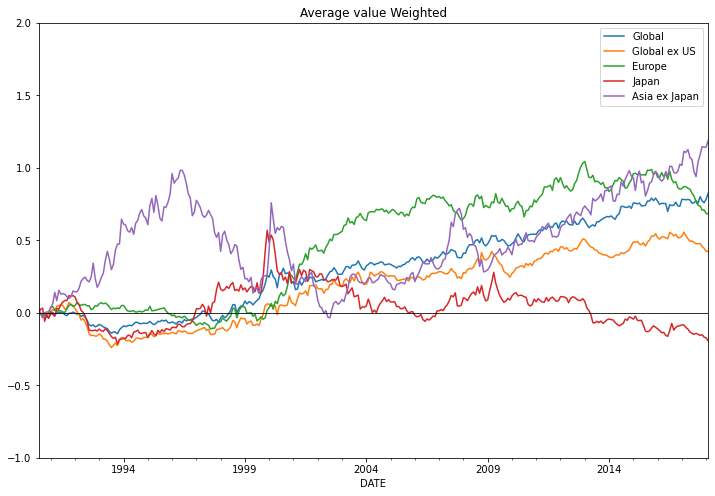

In [34]:
# 시각화
ax6 = x4.plot(figsize=(12,8))
ax6.set_xlim(pd.Timestamp('1990-07'), pd.Timestamp('2018-02'))
ax6.set_ylim(-1, 2)
ax6.axhline(0, color='black',lw=0.8)
ax6.set_title('Average value Weighted')

ax6

### 2.4.2. 동일가중기준

In [35]:
data2_glo = pd.read_excel('동일가중기준CMA.xlsx', sheet_name=0,index_col=0)
data2_exus = pd.read_excel('동일가중기준CMA.xlsx', sheet_name=1,index_col=0)
data2_eu = pd.read_excel('동일가중기준CMA.xlsx', sheet_name=2,index_col=0)
data2_jpn = pd.read_excel('동일가중기준CMA.xlsx', sheet_name=3,index_col=0)
data2_exjpn = pd.read_excel('동일가중기준CMA.xlsx', sheet_name=4,index_col=0)

data2_glo.index = pd.to_datetime(data2_glo.index)
data2_exus.index = pd.to_datetime(data2_exus.index)
data2_eu.index = pd.to_datetime(data2_eu.index)
data2_jpn.index = pd.to_datetime(data2_jpn.index)
data2_exjpn.index = pd.to_datetime(data2_exjpn.index)

In [36]:
data2_glo.head()

,SMALL LoINV,ME1 INV2,SMALL HiINV,BIG LoINV,ME2 INV2,BIG HiINV
DATE,,,,,,
1990-07-01,1.90,1.55,0.97,2.83,2.17,1.81
1990-08-01,-7.46,-9.19,-10.08,-11.46,-11.44,-11.89
1990-09-01,-7.88,-8.10,-9.88,-11.64,-11.74,-13.48
1990-10-01,-1.62,0.99,-1.24,10.48,9.87,10.10
1990-11-01,-1.17,0.44,0.83,-3.78,-3.36,-2.04


In [37]:
data1 = (data2_glo['SMALL LoINV']-data2_glo['SMALL HiINV']) - (data2_glo['BIG LoINV']-data2_glo['BIG HiINV'])
data2 = (data2_exus['SMALL LoINV']-data2_exus['SMALL HiINV']) - (data2_exus['BIG LoINV']-data2_exus['BIG HiINV'])
data3 = (data2_eu['SMALL LoINV']-data2_eu['SMALL HiINV']) - (data2_eu['BIG LoINV']-data2_eu['BIG HiINV'])
data4 = (data2_jpn['SMALL LoINV']-data2_jpn['SMALL HiINV']) - (data2_jpn['BIG LoINV']-data2_jpn['BIG HiINV'])
data5 = (data2_exjpn['SMALL LoINV']-data2_exjpn['SMALL HiINV']) - (data2_exjpn['BIG LoINV']-data2_exjpn['BIG HiINV'])

In [38]:
# 누적수익률 계산
data1 = (1 + data1/100).cumprod() - 1
data2 = (1 + data2/100).cumprod() - 1
data3 = (1 + data3/100).cumprod() - 1
data4 = (1 + data4/100).cumprod() - 1
data5 = (1 + data5/100).cumprod() - 1

In [39]:
y = pd.DataFrame({'Global': data1,
                 'Global ex US': data2,
                 'Europe': data3,
                 'Japan': data4,
                 'Asia ex Japan': data5
                 })
y = y[['Global', 'Global ex US', 'Europe', 'Japan', 'Asia ex Japan']]
y

,Global,Global ex US,Europe,Japan,Asia ex Japan
DATE,,,,,
1990-07-01,-0.000900,-0.002600,-0.003400,-0.010900,0.022600
1990-08-01,0.020980,0.026923,0.011748,0.013234,0.043563
1990-09-01,0.022614,0.046127,0.029150,0.017490,0.045233
1990-10-01,0.014842,0.034619,0.029665,0.000294,0.033631
1990-11-01,0.012203,0.026963,0.037696,0.015298,-0.016190
...,...,...,...,...,...
2023-03-01,5.459511,5.679897,3.483938,0.224201,19.467606
2023-04-01,5.345824,5.601742,3.411298,0.223834,18.888373
2023-05-01,5.543179,5.734437,3.452323,0.229831,19.757495


<AxesSubplot:title={'center':'Average equal Weighted'}, xlabel='DATE'>

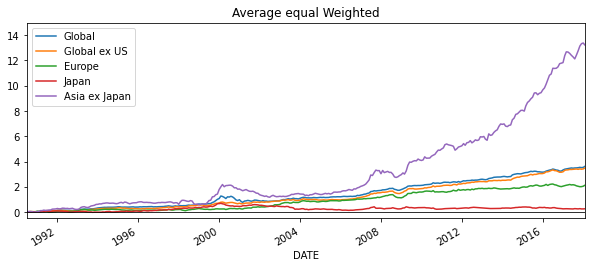

In [40]:
# 시각화
ax7 = y.plot(figsize=(10, 4))
ax7.set_xlim('1990-07', '2018-02')
ax7.set_ylim(-0.5, 15)
ax7.axhline(0, color='black',lw=0.8)
ax7.set_title('Average equal Weighted')

ax7

출처: 김병규, 이현열 (2017). "Smart Beta, 감정을 이기는 퀀트투자 스마트 베타"

### NEXT ▷ [ [03] 저위험 팩터 ](http://localhost:8888/notebooks/OneDrive%20-%20%EA%B2%BD%ED%9D%AC%EB%8C%80%ED%95%99%EA%B5%90/%EB%B0%94%ED%83%95%20%ED%99%94%EB%A9%B4/FELAB/SmartBeta/Smart%20Beta%20%5B03%5D%20%EC%A0%80%EC%9C%84%ED%97%98%20%ED%8C%A9%ED%84%B0_%EC%9B%94%EB%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0(1973~2018).ipynb)